# Customer Churn Prediction 

| Column Name       | Description                                  | Data Type   |
|-------------------|----------------------------------------------|-------------|
| customerID        | Unique customer identifier                   | Object      |
| gender            | Customer's gender (Male or Female)          | Object      |
| SeniorCitizen     | Senior citizen status (1 for Yes, 0 for No) | Integer     |
| Partner           | Whether the customer has a partner (Yes/No) | Object      |
| Dependents        | Whether the customer has family members or dependents who are also using the same service or subscription (Yes/No)| Object      |
| tenure            | Number of months customer stayed            | Integer     |
| PhoneService      | Phone service status (Yes or No)            | Object      |
| MultipleLines     | Multiple phone lines status (Yes/No/No svc) | Object      |
| InternetService   | Internet service provider (DSL, Fiber, No)  | Object      |
| OnlineSecurity    | Online security status (Yes/No/No svc)      | Object      |
| OnlineBackup      | Online backup status (Yes/No/No svc)        | Object      |
| DeviceProtection  | Device protection status (Yes/No/No svc)    | Object      |
| TechSupport       | Tech support status (Yes/No/No svc)         | Object      |
| StreamingTV       | Streaming TV status (Yes/No/No svc)         | Object      |
| StreamingMovies   | Streaming movies status (Yes/No/No svc)     | Object      |
| Contract          | Contract type (Month-to-month, 1 yr, 2 yr)  | Object      |
| PaperlessBilling  | Paperless billing status (Yes/No)           | Object      |
| PaymentMethod     | Payment method chosen by customer           | Object      |
| MonthlyCharges    | Monthly charges incurred by the customer   | Float       |
| TotalCharges      | Total charges incurred by the customer     | Object      |
| Churn             | Churn status (Yes/No)...measure of customers leaving the business                        | Object      |

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
cc = pd.read_csv('telco_customer_churn.csv')
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# cc.isnull().sum()
# No null values

In [ ]:
cc.shape

(7043, 21)

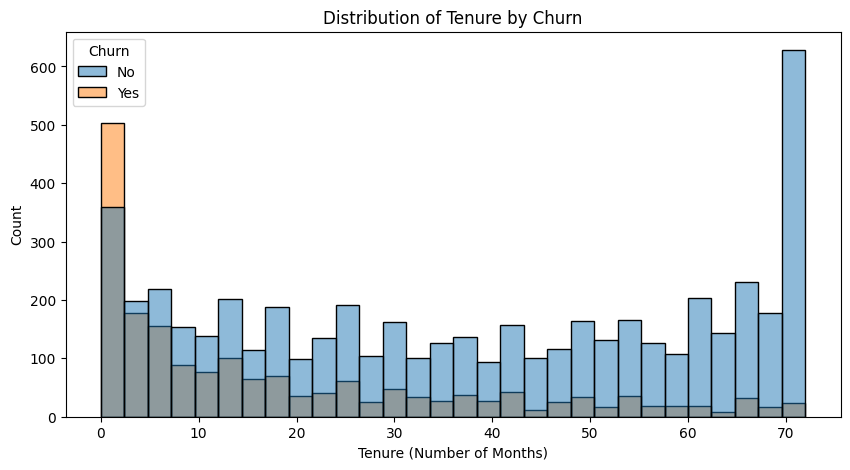

In [ ]:
# Tenure means the number of months the customer has stayed with the company
plt.figure(figsize=(10, 5))
sns.histplot(data=cc, x='tenure', hue='Churn', bins=30, kde=False, common_norm=False)

# Setting labels and title
plt.xlabel('Tenure (Number of Months)')
plt.ylabel('Count')
plt.title('Distribution of Tenure by Churn')

# Show the plot
plt.show()

### Data Cleaning

In [ ]:
# pd.to_numeric(cc['TotalCharges'])
# ValueError: Unable to parse string " " at position 488
pd.to_numeric(cc['TotalCharges'], errors = 'coerce') # It works but...

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [ ]:
# ...we got null values to deal with 
print("Null values in TotalCharges:", pd.to_numeric(cc['TotalCharges'], errors = 'coerce').isnull().sum())

Null values in TotalCharges: 11


In [ ]:
cc[pd.to_numeric(cc['TotalCharges'], errors = 'coerce').isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
# Converting dtype of TotalCharges from string to integer/float 
cc.TotalCharges = pd.to_numeric(cc['TotalCharges'], errors = 'coerce')

In [ ]:
# Filling null values with mean of TotalCharges
mean_value = cc['TotalCharges'].mean()
cc['TotalCharges'].fillna(mean_value, inplace=True)

In [ ]:
cc.TotalCharges.isnull().sum()

0

In [ ]:
# Dropping unwanted columns
cc.drop('customerID', axis='columns', inplace = True)

In [ ]:
cc.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

### Data Scaling

In [ ]:
# Replacing unnescessary data 
for col in cc:
    if cc[col].dtypes == 'object':
        print(col ,cc[col].unique())

gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


In [ ]:
cc.replace('No phone service', 'No', inplace = True)
cc.replace('No internet service', 'No', inplace = True)

In [ ]:
for col in cc:
    if cc[col].dtypes == 'object':
        print(col ,cc[col].unique())

gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes']
OnlineBackup ['Yes' 'No']
DeviceProtection ['No' 'Yes']
TechSupport ['No' 'Yes']
StreamingTV ['No' 'Yes']
StreamingMovies ['No' 'Yes']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


In [ ]:
yes_no_cols = []
for col in cc:
    unique_cols = cc[col].unique()
    if sorted(unique_cols) == ['No', 'Yes']:
        yes_no_cols.append(col)

print(yes_no_cols)

['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']


In [ ]:
# Replacing catcategorical data with binary values
for col in yes_no_cols:
    cc[col].replace({'Yes': 1, 'No': 0}, inplace=  True)

In [ ]:
for col in cc:
    if cc[col].dtypes == 'object':
        print(col ,cc[col].unique())

gender ['Female' 'Male']
InternetService ['DSL' 'Fiber optic' 'No']
Contract ['Month-to-month' 'One year' 'Two year']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [ ]:
cc['gender'].replace({'Male': 0, 'Female': 1}, inplace = True)

In [ ]:
for col in cc:
    if cc[col].dtypes == 'object':
        print(col ,cc[col].unique())

InternetService ['DSL' 'Fiber optic' 'No']
Contract ['Month-to-month' 'One year' 'Two year']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


If you have many categorical features or features with high cardinality (many unique values), this can lead to a significant increase in the number of columns and data size.

Whereas for us, our cardinality is 3

In [ ]:
cc1 = pd.get_dummies(data = cc, columns=['InternetService', 'Contract', 'PaymentMethod'])

In [ ]:
cc1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
1,0,0,0,0,34,1,0,1,0,1,...,True,False,False,False,True,False,False,False,False,True
2,0,0,0,0,2,1,0,1,1,0,...,True,False,False,True,False,False,False,False,False,True
3,0,0,0,0,45,0,0,1,0,1,...,True,False,False,False,True,False,True,False,False,False
4,1,0,0,0,2,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False


In [ ]:
# Finding bool columns
bool_cols = []
for col in cc1:
    if cc1[col].dtypes == 'bool':
        bool_cols.append(col)

print(bool_cols)

['InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']


In [ ]:
# Converting booleans into integer dtype
for col in bool_cols:
    cc1[col] = cc1[col].astype(int)

In [ ]:
# Scaling the remaining data 
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = MinMaxScaler()
cc1[cols_to_scale] = scaler.fit_transform(cc1[cols_to_scale])

In [ ]:
for col in cc1:
    print(col ,cc1[col].unique())

gender [1 0]
SeniorCitizen [0 1]
Partner [1 0]
Dependents [0 1]
tenure [0.01388889 0.47222222 0.02777778 0.625      0.11111111 0.30555556
 0.13888889 0.38888889 0.86111111 0.18055556 0.22222222 0.80555556
 0.68055556 0.34722222 0.95833333 0.72222222 0.98611111 0.29166667
 0.16666667 0.41666667 0.65277778 1.         0.23611111 0.375
 0.06944444 0.63888889 0.15277778 0.97222222 0.875      0.59722222
 0.20833333 0.83333333 0.25       0.91666667 0.125      0.04166667
 0.43055556 0.69444444 0.88888889 0.77777778 0.09722222 0.58333333
 0.48611111 0.66666667 0.40277778 0.90277778 0.52777778 0.94444444
 0.44444444 0.76388889 0.51388889 0.5        0.56944444 0.08333333
 0.05555556 0.45833333 0.93055556 0.31944444 0.79166667 0.84722222
 0.19444444 0.27777778 0.73611111 0.55555556 0.81944444 0.33333333
 0.61111111 0.26388889 0.75       0.70833333 0.36111111 0.
 0.54166667]
PhoneService [0 1]
MultipleLines [0 1]
OnlineSecurity [0 1]
OnlineBackup [1 0]
DeviceProtection [0 1]
TechSupport [0 1]
Strea

In [ ]:
correlation_matrix = cc1.corr()
churn_correlations = correlation_matrix["Churn"].sort_values(ascending=False)
print(churn_correlations)

Churn                                      1.000000
Contract_Month-to-month                    0.405103
InternetService_Fiber optic                0.308020
PaymentMethod_Electronic check             0.301919
MonthlyCharges                             0.193356
PaperlessBilling                           0.191825
SeniorCitizen                              0.150889
StreamingTV                                0.063228
StreamingMovies                            0.061382
MultipleLines                              0.040102
PhoneService                               0.011942
gender                                     0.008612
DeviceProtection                          -0.066160
OnlineBackup                              -0.082255
PaymentMethod_Mailed check                -0.091683
PaymentMethod_Bank transfer (automatic)   -0.117937
InternetService_DSL                       -0.124214
PaymentMethod_Credit card (automatic)     -0.134302
Partner                                   -0.150448
Dependents  

- A positive correlation (e.g., values close to 1) suggests that as the values in the other column increase, the likelihood of churn increases. For example, "Contract_Month-to-month" and "InternetService_Fiber optic" have positive correlations with churn, indicating that customers with month-to-month contracts or fiber optic internet service are more likely to churn.
<br><br>
- A negative correlation (e.g., values close to -1) suggests that as the values in the other column increase, the likelihood of churn decreases. For example, "tenure" has a negative correlation with churn, suggesting that customers with longer tenure are less likely to churn.
<br><br>
- Correlation values close to 0 indicate a weak linear relationship between the columns. For example, "gender" and "PhoneService" have correlation values close to 0, suggesting that these factors have little to no impact on churn.

## Building Model

In [ ]:
from sklearn.model_selection import train_test_split
X = cc1.drop('Churn', axis = 'columns')
y = cc1['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
yp = model.predict(X_test)
yp[:10]

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [ ]:
y_test[:10]

185     1
2715    0
3825    0
1807    1
132     0
1263    1
3732    0
1672    0
811     1
2526    1
Name: Churn, dtype: int64

In [ ]:
y_pred = []
for ele in yp:
    if ele > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
        
y_pred[:10]

[1, 0, 0, 1, 0, 0, 0, 0, 0, 0]

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



In [ ]:
print(tf.math.confusion_matrix(labels = y_test, predictions= y_pred))

tf.Tensor(
[[936 100]
 [151 222]], shape=(2, 2), dtype=int32)


Text(50.722222222222214, 0.5, 'Truth')

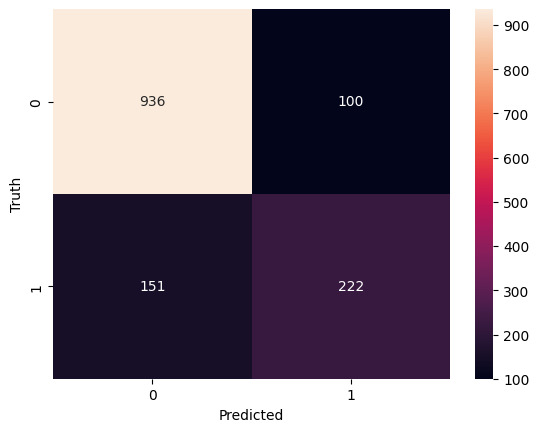

In [ ]:
cm = tf.math.confusion_matrix(labels = y_test, predictions= y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

- **True Positives (TP):** These are cases where the model correctly predicted the positive class. In our matrix, there are (approx) 222 true positives (bottom-right corner). These are customers who were correctly predicted to churn.
<br><br>
- **True Negatives (TN):** These are cases where the model correctly predicted the negative class. In our matrix, there are (approx) 936 true negatives (top-left corner). These are customers who were correctly predicted not to churn.
<br><br>
- **False Positives (FP):** These are cases where our model incorrectly predicted the positive class when it should have predicted the negative class. There are 100 false positives (top-right corner). These are customers who were incorrectly predicted to churn when they didn't (Type I error).
<br><br>
- **False Negatives (FN):** These are cases where the model incorrectly predicted the negative class when it should have predicted the positive class. There are 151 false negatives (bottom-left corner). These are customers who were incorrectly predicted not to churn when they did (Type II error)..
<br><br>
Accuracy can be calculated as (TP + TN) / (TP + TN + FP + FN), and it represents the overall correctness of predictions.

In [ ]:
# Which features have the most significant impact on churn prediction.
# It indicates the impact (coefficients) of each feature on churn prediction.
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print(coefficients)

                                    Feature  Coefficient
15                             TotalCharges     1.208454
17              InternetService_Fiber optic     0.813961
19                  Contract_Month-to-month     0.707964
13                         PaperlessBilling     0.330965
12                          StreamingMovies     0.305652
24           PaymentMethod_Electronic check     0.272054
6                             MultipleLines     0.253087
11                              StreamingTV     0.202504
1                             SeniorCitizen     0.157519
0                                    gender     0.052159
2                                   Partner     0.045622
20                        Contract_One year     0.035142
16                      InternetService_DSL    -0.006630
9                          DeviceProtection    -0.018526
22  PaymentMethod_Bank transfer (automatic)    -0.060251
25               PaymentMethod_Mailed check    -0.062319
14                           Mo

Features with larger absolute coefficients have a more significant impact on churn prediction. In this case, "TotalCharges" has the highest positive coefficient (1.208454), indicating it has the most significant positive impact on predicting churn.

# Alpha Testing

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

In [ ]:
classifiers.items()

dict_items([('Logistic Regression', LogisticRegression()), ('Random Forest', RandomForestClassifier()), ('Support Vector Machine', SVC())])

In [ ]:
# Evaluating each classifier using cross-validation
results = {}
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    results[name] = scores

for name, scores in results.items():
    print(f"{name}: Mean Accuracy = {scores.mean():.2f}, Standard Deviation = {scores.std():.2f}")

Logistic Regression: Mean Accuracy = 0.80, Standard Deviation = 0.01
Random Forest: Mean Accuracy = 0.79, Standard Deviation = 0.01
Support Vector Machine: Mean Accuracy = 0.80, Standard Deviation = 0.01
